In [42]:
import numpy as np
from sklearn.datasets import make_regression
import matplotlib.pyplot as plt

In [43]:
x, y = make_regression(n_samples=100, n_features=1, noise=10) # nous créons des matrice x et y rempli de 100 ligne et d'une colone chacun
y = y + abs(y/2)

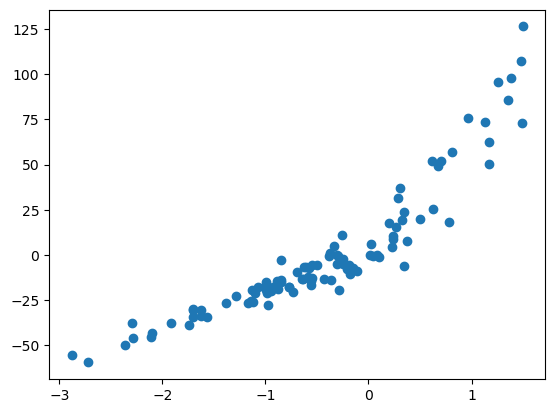

In [44]:
plt.scatter(x,y)# nous trace la courbe


In [45]:
y=y.reshape(100,1)# redimesionne la trice y  à cause de l'erreur de make regression
print(x.shape)
print(y.shape)

(100, 1)
(100, 1)


In [46]:
X = np.hstack((x, np.ones(x.shape)))# crer la matice X constituer de plusieurs ligne et 2 colonne avec une 2 eme colomne rempli de 1 
X = np.hstack((x**2, X))#  ainsi X= [x²,x,1]
X

array([[ 1.41683156e-04,  1.19030734e-02,  1.00000000e+00],
       [ 2.44663230e+00, -1.56417144e+00,  1.00000000e+00],
       [ 2.63172551e+00, -1.62225939e+00,  1.00000000e+00],
       [ 2.91355371e+00, -1.70691350e+00,  1.00000000e+00],
       [ 9.53825301e-01, -9.76639801e-01,  1.00000000e+00],
       [ 8.29446513e+00, -2.88001131e+00,  1.00000000e+00],
       [ 2.95501199e-01, -5.43600220e-01,  1.00000000e+00],
       [ 1.36600572e+00,  1.16876248e+00,  1.00000000e+00],
       [ 1.88055757e-01, -4.33653960e-01,  1.00000000e+00],
       [ 1.08981976e-01, -3.30124182e-01,  1.00000000e+00],
       [ 2.63347832e+00, -1.62279953e+00,  1.00000000e+00],
       [ 3.66238682e+00, -1.91373635e+00,  1.00000000e+00],
       [ 2.23424438e+00,  1.49473890e+00,  1.00000000e+00],
       [ 1.31011909e+00, -1.14460434e+00,  1.00000000e+00],
       [ 1.20730086e-01,  3.47462353e-01,  1.00000000e+00],
       [ 2.88452624e+00, -1.69838931e+00,  1.00000000e+00],
       [ 7.38448986e+00, -2.71744179e+00

In [47]:
theta = np.random.randn(3,1) # crée le a et b du vecteur theta de manière aléatoire
theta

array([[-1.13094838],
       [-1.68979514],
       [ 0.79594755]])

# Model

In [48]:
def model(X, theta):
    return X.dot(theta)

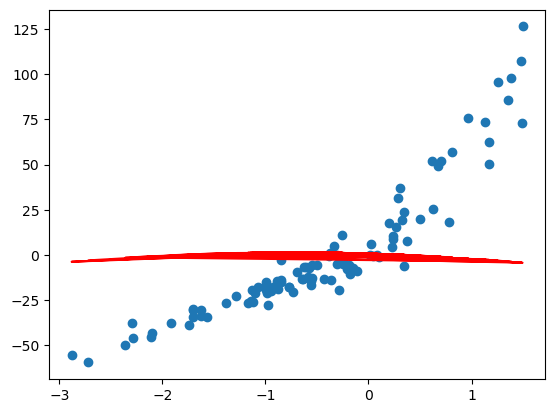

In [49]:
plt.scatter(x,y)
plt.plot(x,model(X, theta), c='r')

In [50]:
def cost_function(X , y, theta):
    m = len(y)
    return 1/(2*m) * np.sum((model(X, theta)- y)**2)

In [51]:
cost_function(X, y, theta)

690.1051786305044

# gradients  

In [52]:
def grad (X, y, theta):
    m = len(y)
    return 1/m * X.T.dot(model(X, theta) - y)

# decente de gradient

In [53]:
def gradient_descent(X, y, theta, learning_rate, n_iteration):
    cost_history = np.zeros(n_iteration)
    for i in range(0, n_iteration):
        theta = theta - learning_rate * grad(X, y, theta)
    return theta, cost_history

# Machine learning

In [54]:
theta_final, cost_history = gradient_descent(X, y, theta, learning_rate = 0.1, n_iteration=1000) # ajutement des variables a et b de theta

In [55]:
theta_final

array([[ 8.70552228],
       [42.28175986],
       [ 9.09874989]])

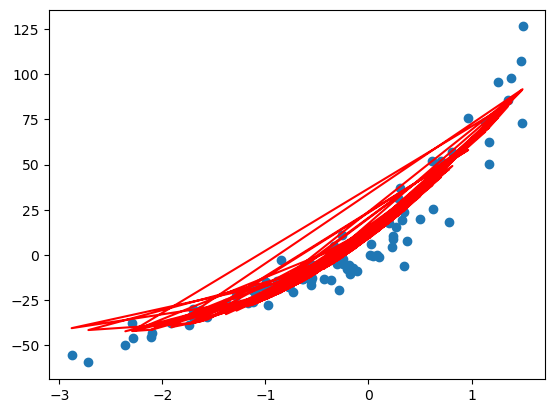

In [56]:
predictions = model (X, theta_final)
plt.scatter(x,y)
plt.plot(x, predictions, c='r')

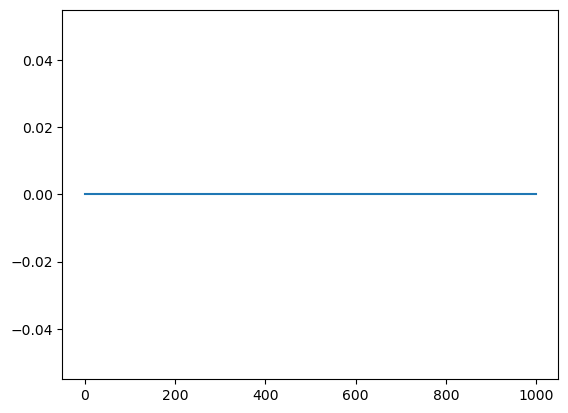

In [57]:
plt.plot(range(1000), cost_history)

# Coeficiant de détermintion r² 

In [58]:
def coef_determination(y, pred):
    u = ((y - pred)**2).sum()

    v = ((y-y.mean())**2).sum()
    return 1 -u/v

In [59]:
coef_determination(y,predictions)

0.9171297240224353